0    34.20
1    31.67
2    17.50
3     7.91
4     4.48
5     3.95
Name: Stony_coral_cover, dtype: float64

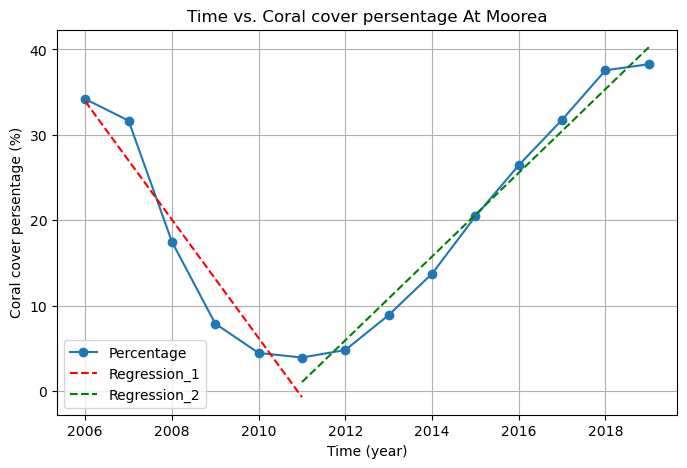

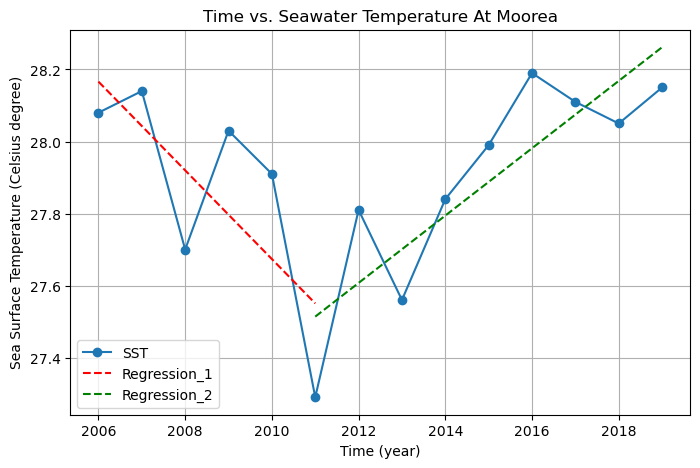

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

csv_path1 = 'coral_cover.csv'
csv_path2 = 'temp_in_situ.csv'
df_coral = pd.read_csv(csv_path1)
df_temp = pd.read_csv(csv_path2)

condition = df_coral['Location'] == "Moorea"
df_coral_filtered = df_coral[condition]


condition_temp = df_temp['Location'] == "Moorea"
df_temp_filtered = df_temp[condition_temp]


condition_temp2 = df_temp_filtered['Habitat'] == "Back Reef"
df_temp_filtered = df_temp_filtered[condition_temp2]

df_temp_filtered["Temperature"] = pd.to_numeric(df_temp_filtered["Temperature"], errors='coerce')

list1 = []
list2 = []
for i in range(2006,2020):
    list1.append(round(df_coral_filtered["Stony_coral_cover"][df_coral_filtered['Year'] == i].mean(), 2))
    list2.append(i)

df_coral_avg = pd.DataFrame()
df_coral_avg["Year"] = list2
df_coral_avg["Stony_coral_cover"] = list1


list_temp1 = []
list_temp2 = []
time = []
list_Month = ["January", "Februrary", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
for i in range(2006, 2020):
    for k in range(12):
        list_temp1.append(round(df_temp_filtered["Temperature"][(df_temp_filtered['Year'] == i) & (df_temp_filtered['Month'] == list_Month[k])].mean(), 2))
       
    list_temp2.append(np.round(np.mean(list_temp1),2))
    list_temp1 = []
    time.append(i)


df_temp_new = pd.DataFrame()
df_temp_new["Year"] = time
df_temp_new["Temperature"] = list_temp2



fig, ax1 = plt.subplots(figsize = (8,5))
x1 = df_coral_avg["Year"]
y1 = df_coral_avg["Stony_coral_cover"]

x11 = df_coral_avg["Year"][(df_coral_avg['Year'] >= 2006) & (df_coral_avg['Year'] <= 2011)]
x12 = df_coral_avg["Year"][(df_coral_avg['Year'] >= 2011) & (df_coral_avg['Year'] <= 2019)]

df_coral_avg1 = df_coral_avg["Stony_coral_cover"][(df_coral_avg['Year'] >= 2006) & (df_coral_avg['Year'] <= 2011)]
df_coral_avg2 = df_coral_avg["Stony_coral_cover"][(df_coral_avg['Year'] >= 2011) & (df_coral_avg['Year'] <= 2019)]
display(df_coral_avg1)
df_temp_new1 = df_temp_new["Temperature"][(df_temp_new['Year'] >= 2006) & (df_temp_new['Year'] <= 2011)]
df_temp_new2 = df_temp_new["Temperature"][(df_temp_new['Year'] >= 2011) & (df_temp_new['Year'] <= 2019)]
ax1.plot(x1, y1, linestyle = "-", marker = "o")

slope1, intercept1, rvalue1, pvalue1, stderr1 = stats.linregress(x11, df_coral_avg1)
slope12, intercept12, rvalue12, pvalue12, stderr12 = stats.linregress(x12, df_coral_avg2)

y_values1 = slope1 * x11 + intercept1
y_values12 = slope12 * x12 + intercept12
ax1.plot(x11, y_values1, color = "r", linestyle = "--")
ax1.plot(x12, y_values12, color = "g", linestyle = "--")
ax1.set_xlabel("Time (year)")
ax1.set_ylabel("Coral cover persentage (%)")
ax1.set_title("Time vs. Coral cover persentage At Moorea")
ax1.grid()
ax1.legend(["Percentage","Regression_1","Regression_2"])

fig, ax2 = plt.subplots(figsize = (8,5))
x2 = df_temp_new["Year"]
y2 = df_temp_new["Temperature"]

x21 = df_temp_new["Year"][(df_temp_new['Year'] >= 2006) & (df_temp_new['Year'] <= 2011)]
x22 = df_temp_new["Year"][(df_temp_new['Year'] >= 2011) & (df_temp_new['Year'] <= 2019)]

ax2.plot(x2, y2, linestyle = "-", marker = "o")

slope2, intercept2, rvalue2, pvalue2, stderr2 = stats.linregress(x21, df_temp_new1)
slope22, intercept22, rvalue22, pvalue22, stderr22 = stats.linregress(x22, df_temp_new2)
y_values2 = slope2 * x21 + intercept2
y_values22 = slope22 * x22 + intercept22

ax2.plot(x21, y_values2, color = "r", linestyle = "--")
ax2.plot(x22, y_values22, color = "g", linestyle = "--")

ax2.set_xlabel("Time (year)")
ax2.set_ylabel("Sea Surface Temperature (Celsius degree)")
ax2.set_title("Time vs. Seawater Temperature At Moorea")
ax2.grid()
ax2.legend(["SST","Regression_1","Regression_2"])

/tmp/ipykernel_86/2398208794.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_new['temp_seawaterSurface'] = pd.to_numeric(df_temp_new['temp_seawaterSurface'], errors='coerce')


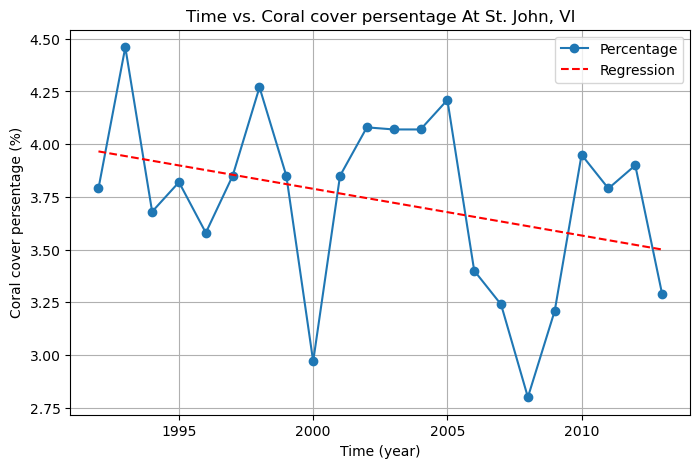

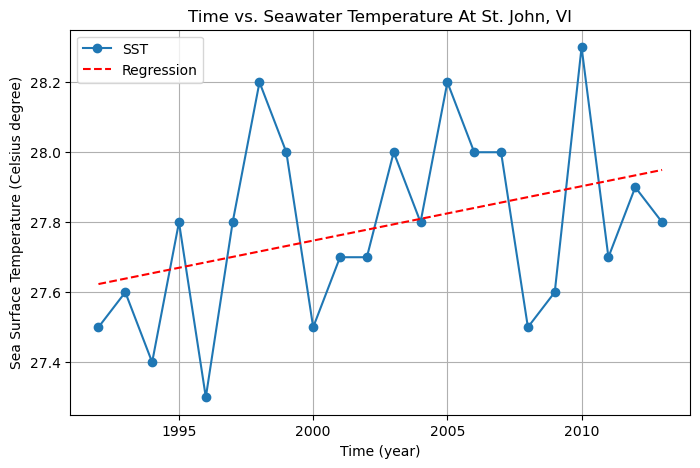

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

csv_path1 = 'coral_cover.csv'
csv_path2 = 'physical_data.csv'
df_coral = pd.read_csv(csv_path1)
df_temp = pd.read_csv(csv_path2)

condition = df_coral['Location'] == "St. John"
df_coral_filtered = df_coral[condition]


list1 = []
list2 = []
for i in range(1992,2014):
    list1.append(round(df_coral_filtered["Stony_coral_cover"][df_coral_filtered['Year'] == i].mean(), 2))
    list2.append(i)

df_coral_avg = pd.DataFrame()
df_coral_avg["Year"] = list2
df_coral_avg["Stony_coral_cover"] = list1


df_temp_new = df_temp[(df_temp['year'] >= 1992) & (df_temp['year'] <= 2013)]
df_temp_new['temp_seawaterSurface'] = pd.to_numeric(df_temp_new['temp_seawaterSurface'], errors='coerce')


fig, ax1 = plt.subplots(figsize = (8,5))
x1 = df_coral_avg["Year"]
y1 = df_coral_avg["Stony_coral_cover"]

ax1.plot(x1, y1, linestyle = "-", marker = "o")

slope1, intercept1, rvalue1, pvalue1, stderr1 = stats.linregress(x1,y1)
y_values1 = slope1 * x1 + intercept1
ax1.plot(x1, y_values1, color = "r", linestyle = "--")
ax1.set_xlabel("Time (year)")
ax1.set_ylabel("Coral cover persentage (%)")
ax1.set_title("Time vs. Coral cover persentage At St. John, VI")
ax1.grid()
ax1.legend(["Percentage","Regression"])

fig, ax2 = plt.subplots(figsize = (8,5))
x2 = df_temp_new["year"]
y2 = df_temp_new["temp_seawaterSurface"]



ax2.plot(x2, y2, linestyle = "-", marker = "o")

slope2, intercept2, rvalue2, pvalue2, stderr2 = stats.linregress(x2,y2)
y_values2 = slope2 * x2 + intercept2
ax2.plot(x2, y_values2, color = "r", linestyle = "--")

ax2.set_xlabel("Time (year)")
ax2.set_ylabel("Sea Surface Temperature (Celsius degree)")
ax2.set_title("Time vs. Seawater Temperature At St. John, VI")
ax2.grid()
ax2.legend(["SST","Regression"])